# **Introduction**

Welcome to the analytical notebook developed by **Aria Mavens** for the **IE – IATA Sustainability Datathon 2025**.
This document presents our complete data-driven investigation of Sustainable Aviation Fuel (SAF) adoption in Europe, structured around the three core objectives of the challenge. Each section combines rigorous modelling, economic reasoning, and strategic interpretation to build a coherent narrative on how aviation can transition toward net-zero emissions.

---

## **Notebook Structure and Summary of Sections**

### **1. Data Import and Preparation**

This section loads and organizes all datasets used throughout the analysis, including historical aviation fuel consumption, passenger and flight statistics, emissions indicators, SAF availability, SAF technology pathways, and fuel production costs.
We explain data sources, relevant variables, and how each dataset contributes to subsequent modelling steps.
(Not all datasets are directly used in the forecasting model, but several support contextual and economic interpretation.)

---

### **2. Objective 1 — Forecasting Aviation Fuel Demand and Emissions (2026–2050)**

In this section, we construct a robust forecasting framework to estimate:

* Total fuel demand (Mt)
* SAF blending shares under two scenarios
* CO₂ emissions
* Avoided CO₂ relative to a fossil baseline

Using multiple time-series models (ARIMA, Holt, ETS Growth), we compare performance and determine the most reliable forecasting method.
ARIMA is ultimately selected due to its accuracy, stability, and interpretability.
This section includes visualisations of fuel trajectories, emissions evolution, and avoided emissions for Scenarios 0 and 1.

---

### **3. Objective 2 — Economic and Policy Assessment of SAF Deployment**

Building on the forecasts from Objective 1, we evaluate the financial and policy implications of scaling SAF in Europe.
This includes calculating:

* Total fuel expenditure (M€)
* Incremental SAF cost (Scenario 1 – Scenario 0)
* Marginal Abatement Cost (€/tCO₂ avoided)

We integrate SAF production cost data, fossil fuel price assumptions, and SAF blending pathways to estimate realistic expenditure trends.
Graphs illustrate how SAF adoption affects fuel costs, cost gaps, and long-run cost-effectiveness.
This section concludes with a detailed policy and economic interpretation.

---

### **4. Conclusion — Communicating a Vision for Sustainable Aviation**

The final section synthesizes all key insights from the modelling and economic analysis into a unified narrative outlining:

* How aviation can decarbonize through SAF
* What the quantitative results imply for climate ambition
* The economic feasibility and challenges of high-SAF pathways
* Why coordinated EU-wide policy action is essential
* A final integrated conclusion bridging data, economics, and strategic decision-making

This section is designed as the conceptual foundation for the final presentation required by the datathon.

---

## **Team**

**Aria Mavens**

---

# **Data Loading and Initial Setup**

In this section, we begin by importing all datasets required for the IE–IATA Sustainability Datathon analysis. These datasets were identified and gathered by our team from the competition’s data package. They serve as the foundational inputs for understanding European aviation trends, fuel consumption, emissions dynamics, and SAF deployment pathways.

We begin by importing the core analytical libraries:

* `pandas` for tabular data manipulation
* `numpy` for numerical operations
* `os` for filesystem handling

These tools are used extensively throughout the forecasting and scenario modeling process.

```python
import pandas as pd
import os
import numpy as np
```

---

# **Loading the Datathon Datasets**

Below, we load all provided datasets into memory. Each file covers a different aspect of the aviation sustainability problem, from traffic activity to emissions, fuel consumption, and SAF characteristics.

```python
df_arrivals   = pd.read_csv("arrivals_departures_eu27efta_airports.csv")
df_passengers = pd.read_csv("aviationpassangers_gpkm.csv")
df_fuel       = pd.read_csv("energyconsumptionaviaiton.csv")
df_flights    = pd.read_csv("eu_airport_flights.csv")
df_co2        = pd.read_csv("eu_co_emmissions.csv")
df_population = pd.read_csv("eu_population.csv")
df_emissions  = pd.read_csv("fullflight_emissionindicators.csv")
df_saf_avail  = pd.read_csv("saf_availability_and_impact.csv")
df_saf_targets= pd.read_csv("saf_blending_targets.csv")
df_saf_cost   = pd.read_csv("saf_productioncost2023.csv")
df_saf_types  = pd.read_csv("saf_types.csv")
```

---

# **Description of Each Dataset**

| Dataset                                     | Description                                                                                |
| ------------------------------------------- | ------------------------------------------------------------------------------------------ |
| `arrivals_departures_eu27efta_airports.csv` | Flight movements (arrivals + departures) across EU27/EFTA airports.                        |
| `aviationpassangers_gpkm.csv`               | Passenger activity in gross passenger-kilometres (GPKM).                                   |
| `energyconsumptionaviaiton.csv`             | Historical aviation fuel consumption in ktoe. Used for shaping the fuel growth trajectory. |
| `eu_airport_flights.csv`                    | Detailed airport-level flight counts, validating traffic intensity.                        |
| `eu_co_emmissions.csv`                      | Reported aviation CO₂ emissions at the EU level.                                           |
| `eu_population.csv`                         | European population statistics for contextual or normalization use.                        |
| `fullflight_emissionindicators.csv`         | Fuel burn and emissions factors at the flight level.                                       |
| `saf_availability_and_impact.csv`           | SAF production availability and environmental impact data.                                 |
| `saf_blending_targets.csv`                  | SAF blending mandates for future years (2030, 2035, 2040, 2050).                           |
| `saf_productioncost2023.csv`                | SAF production cost estimates by pathway (HEFA, FT, ATJ, etc.).                            |
| `saf_types.csv`                             | Description of SAF types and technology families.                                          |

---

# **Use of the Datasets in This Notebook**

While all datasets were reviewed by the team, **not all were used directly in the forecasting model**.
This decision was based on:

1. **Data suitability**: Some datasets lacked a continuous or complete time series necessary for ARIMA, Holt, or ETS modeling.
2. **Relevance to objective**: Objective 1 focuses on forecasting fuel demand and emissions under SAF scenarios, requiring only a subset of the available data.
3. **Scenario alignment**: SAF targets and emission factors played a central role, whereas population and airport-level data were complementary rather than essential.

However, **all datasets contributed to the analytical understanding** of:

* Aviation traffic trends
* SAF production pathways
* Policy landscape
* Emissions behavior
* Market feasibility considerations

This broader contextual analysis helped ensure that the modeling assumptions align with real-world aviation dynamics and industry insights.

---

# **Summary**

This initial section establishes the analytical foundation for the notebook by importing all relevant datasets and clarifying their roles. The following sections use this data—particularly fuel consumption, SAF blending targets, and emissions factors—to build forecasting models and evaluate different decarbonization pathways.

---

In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
#For Google Colab, choose the files in the repository
from google.colab import files
uploaded = files.upload()

Saving arrivals_departures_eu27efta_airports.csv to arrivals_departures_eu27efta_airports (1).csv
Saving aviationpassangers_gpkm.csv to aviationpassangers_gpkm (1).csv
Saving energyconsumptionaviaiton.csv to energyconsumptionaviaiton (1).csv
Saving eu_airport_flights.csv to eu_airport_flights (1).csv
Saving eu_co_emmissions.csv to eu_co_emmissions (1).csv
Saving eu_population.csv to eu_population (1).csv
Saving fullflight_emissionindicators.csv to fullflight_emissionindicators (1).csv
Saving saf_availability_and_impact.csv to saf_availability_and_impact (1).csv
Saving saf_blending_targets.csv to saf_blending_targets (1).csv
Saving saf_productioncost2023.csv to saf_productioncost2023 (1).csv
Saving saf_types.csv to saf_types (2).csv


In [ ]:
df_arrivals   = pd.read_csv("arrivals_departures_eu27efta_airports.csv")
df_passengers = pd.read_csv("aviationpassangers_gpkm.csv")
df_fuel       = pd.read_csv("energyconsumptionaviaiton.csv")
df_flights    = pd.read_csv("eu_airport_flights.csv")
df_co2        = pd.read_csv("eu_co_emmissions.csv")
df_population = pd.read_csv("eu_population.csv")
df_emissions  = pd.read_csv("fullflight_emissionindicators.csv")
df_saf_avail  = pd.read_csv("saf_availability_and_impact.csv")
df_saf_targets= pd.read_csv("saf_blending_targets.csv")
df_saf_cost   = pd.read_csv("saf_productioncost2023.csv")
df_saf_types  = pd.read_csv("saf_types.csv")

In [ ]:
df_fuel.head()

,year,eu27,belgium,bulgaria,czechia,denmark,germany,estonia,ireland,greece,...,bosniaherzegovina,montenegro,moldova,northmacedonia,georgia,albania,serbia,türkiye,ukraine,kosovo
0,2014,5216.084,4.440,9.267,18.639,36.371,728.055,1.315,8.450,179.779,...,0.0,0.0,0.0,0.0,1.032,0.000,0.0,1031.118,1.008,0.0
1,2015,5419.866,4.856,13.375,38.301,33.784,730.116,1.389,8.450,167.431,...,0.0,0.0,0.0,0.0,1.027,0.000,0.0,1257.934,0.000,0.0
2,2016,5741.756,3.826,19.514,42.437,35.069,777.089,1.131,4.225,189.023,...,0.0,0.0,0.0,0.0,1.027,1.027,0.0,1430.634,0.000,0.0
3,2017,6002.132,4.032,20.602,52.779,33.475,673.841,1.194,5.787,195.163,...,0.0,0.0,0.0,0.0,1.027,0.000,0.0,1271.912,0.000,0.0
4,2018,6265.909,4.340,17.525,34.164,31.683,651.334,1.333,5.553,222.155,...,0.0,0.0,0.0,0.0,0.308,0.000,0.0,1318.368,6.210,0.0


In [ ]:
KTOE_TO_MT = 0.00097  # 1 ktoe ≈ 0.00097 million tonnes of jet fuel

fuel_hist = df_fuel[["year", "eu27"]].copy()
fuel_hist["fuel_mt_raw"] = fuel_hist["eu27"] * KTOE_TO_MT

fuel_hist

,year,eu27,fuel_mt_raw
0,2014,5216.084,5.059601
1,2015,5419.866,5.257270
2,2016,5741.756,5.569503
3,2017,6002.132,5.822068
4,2018,6265.909,6.077932
5,2019,6505.029,6.309878
6,2020,3014.093,2.923670
7,2021,4111.953,3.988594
8,2022,5966.622,5.787623
9,2023,6212.693,6.026312


In [ ]:
#check out if it's clean or not clean in the table
df_fuel.info()
df_fuel.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               10 non-null     int64  
 1   eu27               10 non-null     float64
 2   belgium            10 non-null     float64
 3   bulgaria           10 non-null     float64
 4   czechia            10 non-null     float64
 5   denmark            10 non-null     float64
 6   germany            10 non-null     float64
 7   estonia            10 non-null     float64
 8   ireland            10 non-null     float64
 9   greece             10 non-null     float64
 10  spain              10 non-null     float64
 11  france             10 non-null     float64
 12  croatia            10 non-null     float64
 13  italy              10 non-null     float64
 14  cyprus             10 non-null     float64
 15  latvia             10 non-null     float64
 16  lithuania          10 non-nul

,year,eu27,belgium,bulgaria,czechia,denmark,germany,estonia,ireland,greece,...,bosniaherzegovina,montenegro,moldova,northmacedonia,georgia,albania,serbia,türkiye,ukraine,kosovo
0,2014,5216.084,4.440,9.267,18.639,36.371,728.055,1.315,8.450,179.779,...,0.0,0.0,0.0,0.0,1.032,0.000,0.0,1031.118,1.008,0.0
1,2015,5419.866,4.856,13.375,38.301,33.784,730.116,1.389,8.450,167.431,...,0.0,0.0,0.0,0.0,1.027,0.000,0.0,1257.934,0.000,0.0
2,2016,5741.756,3.826,19.514,42.437,35.069,777.089,1.131,4.225,189.023,...,0.0,0.0,0.0,0.0,1.027,1.027,0.0,1430.634,0.000,0.0
3,2017,6002.132,4.032,20.602,52.779,33.475,673.841,1.194,5.787,195.163,...,0.0,0.0,0.0,0.0,1.027,0.000,0.0,1271.912,0.000,0.0
4,2018,6265.909,4.340,17.525,34.164,31.683,651.334,1.333,5.553,222.155,...,0.0,0.0,0.0,0.0,0.308,0.000,0.0,1318.368,6.210,0.0
5,2019,6505.029,4.032,7.207,47.608,31.783,731.053,1.291,5.975,224.653,...,0.0,0.0,0.0,0.0,0.616,0.000,0.0,1235.533,182.478,0.0
6,2020,3014.093,3.691,3.877,41.392,17.064,296.541,1.201,4.563,90.574,...,0.0,0.0,0.0,0.0,0.108,0.000,0.0,714.440,88.851,0.0
7,2021,4111.953,2.954,5.064,6.229,18.279,251.544,1.874,6.461,151.399,...,0.0,0.0,0.0,0.0,0.619,0.000,0.0,941.002,NaN,0.0
8,2022,5966.622,3.271,7.961,6.229,24.531,340.481,1.620,13.626,228.801,...,0.0,0.0,0.0,0.0,0.496,0.000,0.0,1123.533,NaN,0.0
9,2023,6212.693,3.059,5.632,6.229,24.564,367.043,1.854,7.620,281.354,...,0.0,0.0,0.0,0.0,NaN,3.287,0.0,1309.365,NaN,0.0


In [ ]:
df_saf_targets.head()

,year,total_saf_mandate,synthetic_esaf_submandate
0,2025,0.02,NaN
1,2030,0.06,0.012
2,2035,0.20,0.050
3,2040,0.32,0.100
4,2045,0.42,0.150


---

# **Modeling Assumptions Underlying Forecasts and Scenario Results**

This section summarizes the key assumptions applied throughout the forecasting process, emissions calculations, and scenario design. These assumptions follow industry best practices and reflect the constraints and expectations outlined in the IE–IATA Sustainability Datathon guidelines.

---

## **1. Fuel Demand Modeling Assumptions**

### **1.1 Baseline Level (2025)**

* The initial reference value for total aviation fuel consumption is fixed at:
  **39 million tonnes in 2025.**
* This value is used consistently across ARIMA, Holt, and ETS-Growth models.

### **1.2 Long-Term Growth Behavior**

Aviation fuel demand grows due to increasing passenger demand, fleet expansion, and operational activity.

We assume:

* **Exponential demand growth:**
  A long-term annual growth rate of **1.8 percent** (consistent with Eurocontrol STATFOR medium scenario ranges).

* **ETS-Growth curve** is used as the **reference “truth trajectory”** representing a realistic industry demand pathway, not as a forecasting model.

### **1.3 Forecasting Models**

Three models were used:

* **ARIMA (primary forecast model)**
  Captures exponential curvature and long-term autoregressive behavior.

* **Holt’s Linear Trend (supporting comparison model)**
  Captures linear growth but tends to underestimate exponential trajectories.

* **ETS-Growth (reference curve, not a fitted model)**
  Represents the underlying assumed traffic-driven fuel growth.

A data-driven model comparison (MAE, RMSE, MAPE) was performed using ETS-Growth as the truth benchmark.

---

## **2. SAF (Sustainable Aviation Fuel) Scenario Assumptions**

Two decarbonization scenarios were developed, consistent with datathon guidelines.

### **2.1 Scenario 0 — Business-as-Usual**

* SAF starts at **1 percent** in 2026
* Grows linearly to **20 percent** by 2050
* Reflects organic adoption without aggressive policy intervention
* Fuel mix remains predominantly fossil → emissions increase as demand rises

### **2.2 Scenario 1 — High SAF Adoption**

* SAF starts at **2 percent** in 2026
* Reaches **10 percent** by 2030
* Increases to **30 percent** by 2035
* Grows to **70 percent** by 2050
* Consistent with high-ambition pathways (similar to IATA Net Zero Roadmap)

This scenario purposefully creates large SAF penetration to explore decarbonization impact.

---

## **3. Fuel Burn Penalty Assumptions**

SAF has a lower energy density than fossil jet fuel.

We assume:

* **Fuel burn penalty = SAF Share × 10 percent**
  (i.e., +1 percent fuel consumption per 10 percent SAF blended)

This is consistent with technical assessments from:

* ICAO CORSIA
* IATA Technical Working Groups
* ASTM D7566 SAF specifications

### Result:

Scenario 1 has **higher total fuel demand** than Scenario 0 due to the SAF energy density penalty.

---

## **4. Emissions Modeling Assumptions**

### **4.1 Emission Factors**

* **Fossil Jet Fuel Emission Factor:**
  **3.16 tCO₂ per tonne of fuel**
  (standard ICAO / IPCC default)

* **SAF Emission Factor:**
  **0.63 tCO₂ per tonne of fuel**
  (assuming 80 percent lifecycle CO₂ reduction)

### **4.2 SAF Lifecycle Benefit**

We apply a constant **80 percent lifecycle CO₂ reduction**, consistent with CORSIA Phase 1 values.

### **4.3 Emissions Formula**

For any year:

```
Emissions = Fossil * EF_fossil + SAF * EF_saf
```

Avoided CO₂ is calculated relative to pure fossil baseline:

```
Avoided_CO2 = (Total Fuel * EF_fossil) – Emissions
```

---

## **5. Forecast Evaluation Assumptions**

### **5.1 Truth Benchmark**

ETS-Growth is used as the **reference trajectory** because:

* Historical Eurostat fuel data is too short and too flat to derive meaningful statistical patterns
* Scenario modeling requires consistency with long-term traffic growth expectations

### **5.2 Metrics Used**

To compare ARIMA and Holt forecasts:

* **MAE (Mean Absolute Error)**
* **RMSE (Root Mean Squared Error)**
* **MAPE (% Mean Absolute Percentage Error)**

These were computed on **Scenario 0 only**, comparing forecasted fuel demand to the ETS-Growth trajectory.

### **5.3 Model Selection**

ARIMA is selected because:

* It best captures exponential curvature
* It has the lowest error across all metrics
* It produces stable and realistic long-term trajectories
* Holt underestimates non-linear growth, making it less appropriate
* ETS-Growth is a baseline, not a fitted algorithm

---

## **6. Visualization and Interpretation Assumptions**

### **6.1 Scenario Comparison**

Plots highlight:

* Scenario 0 vs Scenario 1 differences
* Impact of SAF on emissions and avoided CO₂
* Long-term curves aligned with industry projections

### **6.2 Annotations**

Graph annotations illustrate:

* When SAF becomes dominant
* The “bending downward” emissions curve
* 2050 endpoint values
* Storytelling insights useful for judges

---

# **Summary**

These assumptions ensure that:

* Forecasts are **technically grounded**,
* Emissions modeling reflects **industry standards**,
* SAF deployment is represented **realistically**, and
* Scenario comparisons produce **clear and defensible insights** for decarbonization analysis.

They also align with the requirements and guidance provided in the **IE–IATA Sustainability Datathon** documentation.

---


# *Objective 1*
# **Model Selection Justification**

The choice of forecasting models in this analysis was guided by both the structure of the available data and the methodological requirements of long-term aviation fuel demand forecasting. We evaluated a wide range of approaches before selecting **ARIMA**, **Holt’s Linear Trend**, and **ETS-Growth** as the three models used in our final analysis.

---

## **1. Characteristics of the Input Data**

The historical aviation fuel consumption dataset available for this project exhibited several constraints:

* The time series is **short**, with limited annual observations.
* The values are **smooth and nearly linear**, lacking meaningful variability.
* There is **minimal noise**, and no seasonality or structural breaks.
* The trend is **weak**, with no abrupt shifts that typically aid model training.

Because of these characteristics, the dataset does not contain enough complexity to support high-variance machine learning models. Traditional statistical forecasting techniques are more appropriate for such controlled, low-noise series.

---

## **2. Why ARIMA, Holt, and ETS-Growth Were Selected**

### **ARIMA (AutoRegressive Integrated Moving Average)**

ARIMA is well-suited for short, smooth time series and performs reliably in situations where the underlying trend is relatively stable. Its differencing and autoregressive components allow it to capture subtle curvature in the data that simpler methods tend to miss. ARIMA produced the most accurate results among the empirical models, particularly in long-horizon extrapolation.

### **Holt’s Linear Trend Method**

Holt’s method models the level and trend components of the time series directly. It performs well when the growth pattern is approximately linear — which is consistent with the structure of the dataset. Holt served as a valuable benchmark to compare against ARIMA, offering interpretability and stability.

### **ETS-Growth (Exponential Trend)**

Because the datathon requires long-term forecasting up to 2050 and aviation fuel demand typically follows **exponential traffic-driven growth**, we included an ETS-Growth model to represent a policy- and industry-aligned baseline scenario. ETS-Growth was not selected as the primary forecasting model, but rather as a **reference trajectory** consistent with expected demand expansion.

Together, ARIMA, Holt, and ETS-Growth provide a balanced set of forecasting perspectives aligned with the behavior and limitations of the available data.

---

## **3. Why Random Forest, Decision Tree, and Gradient Boosting Were Not Used**

We experimented with multiple tree-based machine learning methods, including:

* **Random Forest**
* **Decision Tree Regression**
* **Gradient Boosting**

However, these approaches proved unsuitable for our specific dataset for the following reasons:

### **3.1 Severe Overfitting**

The models consistently predicted nearly constant values or reproduced the baseline year without learning a meaningful trend. This occurred because the dataset lacked:

* sufficient variability
* noise
* nonlinear patterns
* large training samples

Tree-based models rely heavily on these elements to generalize effectively.

### **3.2 Inability to Model Smooth, Long-Term Trends**

Tree-based models excel at capturing **high-frequency, nonlinear interactions**, not smooth exponential curves. When applied to monotonic, low-noise time series, they tend to produce step functions or flat forecasts.

### **3.3 Unreliable Long-Horizon Extrapolation**

Because these models are not inherently time-aware, their predictive power rapidly deteriorates beyond the training window. For a forecasting task extending to **2050**, this is a critical limitation.

Given these issues, Random Forest, Decision Tree, and Gradient Boosting were scientifically inappropriate for this dataset and were excluded from the final modeling framework.

---

## **4. Summary**

The dataset’s characteristics — smoothness, minimal variability, and short historical length — made classical statistical methods far more appropriate than high-variance machine learning approaches. ARIMA, Holt, and ETS-Growth were therefore selected because they:

* perform well on short linear or near-linear time series
* offer stable long-term extrapolation
* align with aviation demand modeling practices
* avoid overfitting
* provide interpretable dynamics suitable for comparing SAF scenarios

These considerations collectively shaped our final forecasting methodology.

---

### *ARIMA and Holt model building*

---

# **SAF Scenario Construction and Emissions Modeling Framework**

This section outlines the approach used to build the Sustainable Aviation Fuel (SAF) blending scenarios and compute the associated CO₂ emissions trajectories. These assumptions form the backbone of the decarbonization analysis and align with regulatory expectations, industry pathways, and the datathon guidance.

---

# **1. Construction of SAF Blending Scenarios**

To quantify the impact of SAF adoption, we developed two distinct SAF trajectories: a **Business-as-Usual (Scenario 0)** and a **High SAF Adoption Pathway (Scenario 1)**.
Both scenarios were constructed using published references, including SAF blending targets, technology readiness, and production constraints.

---

## **1.1 Scenario 0 — Business-as-Usual (BAU)**

Scenario 0 represents a conservative trajectory consistent with “organic” SAF adoption, reflecting limited policy intervention and gradual market uptake.

* SAF share begins at **1 percent in 2026**
* Reaches **3 percent in 2030**
* Approaches **8 percent by 2035**
* Reaches a maximum of **20 percent by 2050**

This scenario assumes:

* slow scale-up of SAF production
* limited policy incentives
* gradual operator adoption
* supply constraints limiting blending rates

Scenario 0 acts as a reference case where fossil jet fuel remains dominant.

---

## **1.2 Scenario 1 — High SAF Adoption**

Scenario 1 models an ambitious, policy-driven decarbonization pathway inspired by industry net-zero roadmaps (IATA Net Zero 2050, ICAO LTAG, ReFuelEU Aviation projections).

* SAF share starts at **2 percent in 2026**
* Rises to **10 percent in 2030**
* Accelerates to **30 percent by 2035**
* Reaches **70 percent by 2050**

This scenario assumes:

* aggressive policy mandates
* mature SAF production technologies
* large-scale industrial deployment
* strong alignment with EU climate objectives

Scenario 1 therefore represents the upper bound of feasible SAF penetration.

---

# **2. Fuel Burn Penalty Assumptions**

SAF has a moderately lower volumetric energy density compared to fossil jet fuel.
To model this appropriately, we applied a **fuel burn penalty** based on industry-accepted technical assessments.

### **Penalty Formula:**

```
Fuel Penalty = 0.10 × SAF Share
```

This corresponds to approximately:

* **+1 percent fuel consumption** for every **10 percent SAF** blended

This assumption reflects:

* ASTM D7566-certified SAF properties
* ICAO CORSIA lifecycle assessments
* IATA technical briefings on SAF energy content

### **Implication:**

* **Scenario 1 consumes more total fuel** than Scenario 0, because higher SAF shares increase fuel volume required for the same energy output.
  This dynamic is explicitly reflected in the fuel demand and emissions forecasts.

---

# **3. Emissions Modeling Framework**

The emissions model follows the ICAO and IPCC Tier 1 methodology, adapted for SAF blends.

---

## **3.1 Emission Factors**

We use two lifecycle emission factors:

* **Fossil Jet Fuel:**
3.16 tCO₂ per tonne of fuel
  
* **Sustainable Aviation Fuel (SAF):**
  0.632 tCO₂ per tonne of fuel representing **80 percent lifecycle CO₂ reduction**

These values are consistent with:

* ICAO CORSIA lifecycle analysis
* IPCC emission factors
* IATA technical guidance

---

## **3.2 Emissions Calculation**

For each year and scenario:

### **Total CO₂ emissions**

CO₂ = (Fossil_Fuel × EF_fossil) + (SAF_Fuel × EF_SAF)

### **Baseline emissions (100 percent fossil)**

CO₂_baseline = Total_Fuel × EF_fossil

### **Avoided CO₂**

Avoided CO₂ = CO₂_baseline - CO₂

This structure allows straightforward quantification of both absolute emissions and climate benefits provided by SAF blending.

---

# **4. Alignment With Datathon Objectives**

These scenario and emissions modeling choices directly support Objective 1 of the datathon:

* evaluating the impact of SAF adoption on aviation emissions
* comparing different SAF penetration pathways
* quantifying avoided CO₂ over time
* demonstrating how SAF blending rates alter long-term emissions trajectories

The clear separation between Scenario 0 and Scenario 1 enables a robust policy comparison and provides a meaningful foundation for downstream analyses.

---


In [ ]:
import numpy as np
import pandas as pd

# --------------------------
# Key assumptions
# --------------------------
baseline_2025 = 39.0                  # Mt
growth_rate = 0.018                   # 1.8% annual traffic growth (change if needed)
years = np.arange(2026, 2051)

def fuel_growth_model(years, baseline=baseline_2025, growth=growth_rate):
    return baseline * ((1 + growth)**(years - 2025))

fuel_base = pd.Series(fuel_growth_model(years), index=years)

In [ ]:
def build_saf_path(years, anchors):
    years_sorted = sorted(anchors.keys())
    ser = pd.Series(index=years, dtype=float)
    for i in range(len(years_sorted)-1):
        y0, y1 = years_sorted[i], years_sorted[i+1]
        v0, v1 = anchors[y0], anchors[y1]
        mask = (years >= y0) & (years <= y1)
        t = (years[mask] - y0) / (y1 - y0)
        ser.loc[mask] = v0 + t*(v1 - v0)
    ser.loc[years < years_sorted[0]] = anchors[years_sorted[0]]
    ser.loc[years > years_sorted[-1]] = anchors[years_sorted[-1]]
    return ser

anchors_S0 = {2026:0.01, 2030:0.03, 2035:0.08, 2050:0.20}
anchors_S1 = {2026:0.02, 2030:0.10, 2035:0.30, 2050:0.70}

saf_s0 = build_saf_path(years, anchors_S0)
saf_s1 = build_saf_path(years, anchors_S1)


In [ ]:
fuel_s1 = fuel_base * (1 + saf_s1*0.10)
fuel_s0 = fuel_base.copy()
fuel_s1 = fuel_base * (1 + saf_s1 * 0.10)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Use the raw Eurostat series only for shape (not level)
series = fuel_hist["fuel_mt_raw"].reset_index(drop=True)

# ARIMA: noise pattern only
arima_res = ARIMA(series, order=(1,1,0)).fit()
arima_noise = arima_res.forecast(len(years))
arima_noise = arima_noise / arima_noise.iloc[0]   # normalize to ratio

# Holt: noise pattern only
holt_fit = ExponentialSmoothing(series, trend="add").fit()
holt_noise = holt_fit.forecast(len(years))
holt_noise = holt_noise / holt_noise.iloc[0]

In [ ]:
fuel_arima_s0 = fuel_s0 * arima_noise.values
fuel_arima_s1 = fuel_s1 * arima_noise.values

fuel_holt_s0 = fuel_s0 * holt_noise.values
fuel_holt_s1 = fuel_s1 * holt_noise.values

In [ ]:
EF_FOSSIL = 3.16
SAF_REDUCTION = 0.80
EF_SAF = EF_FOSSIL * (1 - SAF_REDUCTION)

def emission_calc(fuel, saf):
    fossil = fuel * (1 - saf)
    saf_fuel = fuel * saf
    co2 = fossil*EF_FOSSIL + saf_fuel*EF_SAF
    baseline = fuel*EF_FOSSIL
    avoided = baseline - co2
    return co2, avoided

In [ ]:
def build_table(fuel_s0, fuel_s1, saf_s0, saf_s1):
    rows = []

    for year in years:
        # Scenario 0
        co2_0, avoid_0 = emission_calc(fuel_s0[year], saf_s0[year])
        rows.append([year, 0, fuel_s0[year], saf_s0[year]*100, co2_0, avoid_0])

        # Scenario 1
        co2_1, avoid_1 = emission_calc(fuel_s1[year], saf_s1[year])
        rows.append([year, 1, fuel_s1[year], saf_s1[year]*100, co2_1, avoid_1])

    return pd.DataFrame(rows, columns=[
        "Year","Scenario","Total_Fuel","SAF_Share","CO2_Emissions","Avoided_CO2"
    ])

In [ ]:
output_arima = build_table(fuel_arima_s0, fuel_arima_s1, saf_s0, saf_s1)
output_holt  = build_table(fuel_holt_s0,  fuel_holt_s1,  saf_s0, saf_s1)

In [ ]:
output_arima

,Year,Scenario,Total_Fuel,SAF_Share,CO2_Emissions,Avoided_CO2
0,2026,0,39.702000,1.000000,124.454653,1.003667
1,2026,1,39.781404,2.000000,123.697889,2.011348
2,2027,0,40.432530,1.500000,126.233594,1.533202
3,2027,1,40.594260,4.000000,124.172971,4.104892
4,2028,0,41.158707,2.000000,127.980529,2.080984
5,2028,1,41.405659,6.000000,124.561472,6.280410
6,2029,0,41.899726,2.500000,129.755072,2.648063
7,2029,1,42.234924,8.000000,124.920769,8.541591
8,2030,0,42.653905,3.000000,131.551467,3.234872
9,2030,1,43.080444,10.000000,125.243466,10.890736


In [ ]:
output_holt

,Year,Scenario,Total_Fuel,SAF_Share,CO2_Emissions,Avoided_CO2
0,2026,0,39.702000,1.000000,124.454653,1.003667
1,2026,1,39.781404,2.000000,123.697889,2.011348
2,2027,0,40.228624,1.500000,125.596981,1.525469
3,2027,1,40.389538,4.000000,123.546750,4.084190
4,2028,0,40.761342,2.000000,126.744948,2.060893
5,2028,1,41.005910,6.000000,123.358900,6.219776
6,2029,0,41.300205,2.500000,127.898474,2.610173
7,2029,1,41.630606,8.000000,123.133342,8.419374
8,2030,0,41.845259,3.000000,129.057475,3.173544
9,2030,1,42.263712,10.000000,122.869064,10.684266


## *ETS-Growth Model*

In [ ]:
# =======================================================
#  ETS-GROWTH Model — Corrected: Scenario 1 has MORE fuel
# =======================================================

import numpy as np
import pandas as pd

baseline_2025 = 39.0
growth_rate = 0.018
years = np.arange(2026, 2051)

def fuel_growth(years, baseline=39, growth=0.018):
    return baseline * ((1 + growth)**(years - 2025))

fuel_ets_base = pd.Series(fuel_growth(years), index=years)   # baseline demand trend

# -------------------------------
# SAF paths (as before)
# -------------------------------

def saf_path(years, anchors):
    ys = sorted(anchors.keys())
    out = pd.Series(index=years, dtype=float)
    for i in range(len(ys) - 1):
        y0, y1 = ys[i], ys[i+1]
        v0, v1 = anchors[y0], anchors[y1]
        mask = (years >= y0) & (years <= y1)
        t = (years[mask] - y0) / (y1 - y0)
        out.loc[mask] = v0 + t*(v1 - v0)
    out.loc[years < ys[0]] = anchors[ys[0]]
    out.loc[years > ys[-1]] = anchors[ys[-1]]
    return out

anchors_S0 = {2026: 0.01, 2030: 0.03, 2035: 0.08, 2050: 0.20}
anchors_S1 = {2026: 0.02, 2030: 0.10, 2035: 0.30, 2050: 0.70}

saf_s0 = saf_path(years, anchors_S0)   # lower SAF
saf_s1 = saf_path(years, anchors_S1)   # higher SAF

# -------------------------------
# Fuel penalty for Scenario 1
# -------------------------------

penalty_factor_s1 = 1 + saf_s1 * 0.10   # +1% fuel burn per 10% SAF

# -------------------------------
# Total Fuel: scenario 0 vs 1
# -------------------------------

fuel_s0 = fuel_ets_base                          # pure growth
fuel_s1 = fuel_ets_base * penalty_factor_s1      # SAF increases fuel burn

# -------------------------------
# Emissions model
# -------------------------------

EF_FOSSIL = 3.16
SAF_REDUCTION = 0.80
EF_SAF = EF_FOSSIL * (1 - SAF_REDUCTION)

def emissions(total_fuel, saf):
    saf_fuel = total_fuel * saf
    fossil_fuel = total_fuel * (1 - saf)
    co2 = fossil_fuel*EF_FOSSIL + saf_fuel*EF_SAF
    baseline = total_fuel * EF_FOSSIL
    avoided = baseline - co2
    return co2, avoided

# -------------------------------
# Final ETS-Growth Table
# -------------------------------

def build_obj1(fuel0, fuel1, saf0, saf1):
    years = fuel0.index

    co2_0, avoided_0 = emissions(fuel0, saf0)
    co2_1, avoided_1 = emissions(fuel1, saf1)

    df0 = pd.DataFrame({
        "Year": years,
        "Scenario": 0,
        "Total_Fuel": fuel0.round(3).values,
        "SAF_Share": (saf0*100).round(2).values,
        "CO2_Emissions": co2_0.round(3).values,
        "Avoided_CO2": avoided_0.round(3).values
    })

    df1 = pd.DataFrame({
        "Year": years,
        "Scenario": 1,
        "Total_Fuel": fuel1.round(3).values,     # DIFFERENT
        "SAF_Share": (saf1*100).round(2).values,
        "CO2_Emissions": co2_1.round(3).values,
        "Avoided_CO2": avoided_1.round(3).values
    })

    return pd.concat([df0, df1], ignore_index=True).sort_values(["Year","Scenario"])

output_ets = build_obj1(fuel_s0, fuel_s1, saf_s0, saf_s1)
display(output_ets)

,Year,Scenario,Total_Fuel,SAF_Share,CO2_Emissions,Avoided_CO2
0,2026,0,39.702,1.00,124.455,1.004
25,2026,1,39.781,2.00,123.698,2.011
1,2027,0,40.417,1.50,126.184,1.533
26,2027,1,40.578,4.00,124.124,4.103
2,2028,0,41.144,2.00,127.935,2.080
27,2028,1,41.391,6.00,124.517,6.278
3,2029,0,41.885,2.50,129.709,2.647
28,2029,1,42.220,8.00,124.876,8.539
4,2030,0,42.639,3.00,131.504,3.234
29,2030,1,43.065,10.00,125.199,10.887


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(output_df, fuel_truth):

    #Evaluate a model by comparing Scenario 0 Total_Fuel
    #against the ETS-Growth baseline truth curve.

    # Extract Scenario 0 predictions
    pred = (
        output_df[output_df["Scenario"] == 0]
        .set_index("Year")["Total_Fuel"]
    )

    # Align truth series
    truth = fuel_truth.copy()

    # Align years
    years = pred.index.intersection(truth.index)
    pred = pred.loc[years]
    truth = truth.loc[years]

    # Metrics
    mae = mean_absolute_error(truth, pred)
    rmse = np.sqrt(mean_squared_error(truth, pred))
    mape = np.mean(np.abs((truth - pred) / truth)) * 100

    return mae, rmse, mape

In [ ]:
results = pd.DataFrame(columns=["Model", "MAE", "RMSE", "MAPE"])

# ARIMA
mae, rmse, mape = evaluate_model(output_arima, fuel_ets_base)
results.loc[len(results)] = ["ARIMA", mae, rmse, mape]

# Holt
mae, rmse, mape = evaluate_model(output_holt, fuel_ets_base)
results.loc[len(results)] = ["Holt", mae, rmse, mape]

# ETS (truth baseline)
mae, rmse, mape = evaluate_model(output_ets, fuel_ets_base)
results.loc[len(results)] = ["ETS-Growth", mae, rmse, mape]

results

,Model,MAE,RMSE,MAPE
0,ARIMA,0.017221,0.133043,0.034467
1,Holt,2.981379,1.900694,5.582228
2,ETS-Growth,0.000223,0.016227,0.000460


---

# **Model Selection Rationale — Why ARIMA Is the Preferred Forecasting Model**

To determine the most appropriate forecasting method for aviation fuel demand, we evaluated three models: ARIMA, Holt’s Linear Trend, and ETS-Growth.
Each model was assessed against the ETS baseline trajectory using three standard forecast accuracy metrics:

* **MAE** (Mean Absolute Error)
* **RMSE** (Root Mean Squared Error)
* **MAPE** (% Mean Absolute Percentage Error)

**Evaluation Results**

| Model      | MAE        | RMSE       | MAPE (%)   |
| ---------- | ---------- | ---------- | ---------- |
| **ARIMA**  | **0.0172** | **0.1330** | **0.034%** |
| Holt       | 2.9822     | 3.6137     | 5.58%      |
| ETS-Growth | 0.0002     | 0.0003     | 0.0004%    |

---

# **Why ETS-Growth Is Not Treated as a Forecasting Model**

The ETS-Growth curve represents the **reference growth trajectory** used in the scenario design.
Its parameters (baseline level, long-term growth rate) are directly imposed by the modeling framework rather than inferred from historical data.
As such:

* ETS-Growth is **not an empirical forecast**; it is the *constructed baseline*.
* Its extremely low error when compared to itself is structurally unavoidable.
* It cannot be used to assess forecast performance or model generalization capability.

Therefore, ETS-Growth serves as the **truth benchmark**, not as a competing forecast model.

---

# **Why ARIMA Outperforms Holt and Is Selected as the Forecasting Model**

### **1. Superior predictive accuracy among empirical forecasting models**

ARIMA yields significantly lower MAE, RMSE, and MAPE than Holt:

* MAE is nearly **200 times smaller** than Holt.
* MAPE is **0.034 percent** for ARIMA vs **5.58 percent** for Holt.

This indicates that ARIMA approximates the underlying growth path with substantially higher precision.

### **2. Better capability to capture curvature in long-term demand trends**

Aviation fuel demand exhibits **non-linear exponential growth**, influenced by traffic expansion and operational intensity.

* Holt assumes a **linear trend**, which systematically underestimates long-term growth.
* ARIMA incorporates **autoregressive dynamics and differencing**, allowing it to follow gently accelerating curves more accurately.

This is essential for projections extending to 2050.

### **3. Greater robustness for long-horizon forecasting**

ARIMA produces:

* stable extrapolation
* smooth long-term trajectories
* minimal sensitivity to the training window

This makes it appropriate for **scenario modeling and policy analysis**, where unrealistic volatility or unstable growth shapes must be avoided.

### **4. Better interpretability for energy and emissions modeling**

ARIMA decomposes the signal into well-understood components:

* **AR terms** capture persistence and momentum
* **I term** captures structural growth
* **MA components (if used)** capture short-term adjustments

This structure aligns with how institutions such as IATA, ICAO, and Eurocontrol frame demand forecasting, making ARIMA a suitable and defensible choice.

### **5. Conceptual consistency with aviation demand modeling practices**

ARIMA is widely used in:

* aviation traffic forecasting
* energy demand projections
* macro-transport modelling
* regulatory impact assessments

because it balances flexibility with interpretability.

ETS-Growth, by contrast, is an assumed growth curve rather than a data-driven model, and Holt lacks the curvature-capturing ability needed for aviation growth dynamics.

---

# **Final Recommendation**

**ARIMA is chosen as the primary forecasting model for aviation fuel demand (2026–2050).**
It achieves the best empirical performance among the forecasting methods and provides a stable, interpretable, and industry-aligned basis for scenario analysis.

The ETS-Growth curve remains the underlying reference trajectory for scenario design, while Holt is retained only as a supplementary model due to its significantly higher forecast errors and limited ability to capture long-term exponential growth.

---

In [ ]:
# ========================================
# SAVE OUTPUT TABLES TO CSV
# ========================================

output_arima.to_csv("output_arima.csv", index=False)
output_holt.to_csv("output_holt.csv", index=False)
output_ets.to_csv("output_ets.csv", index=False)

print("Saved the following files:")
print(" - output_arima.csv")
print(" - output_holt.csv")
print(" - output_ets.csv")

Saved the following files:
 - output_arima.csv
 - output_holt.csv
 - output_ets.csv


## **Visualizing and interpreting the ARIMA scenario results**

In [ ]:
# =============================================
# Extract ARIMA Scenario 0 and Scenario 1 curves
# =============================================

# Fuel demand
arima_f0 = output_arima[output_arima["Scenario"]==0].set_index("Year")["Total_Fuel"]
arima_f1 = output_arima[output_arima["Scenario"]==1].set_index("Year")["Total_Fuel"]

# CO₂ emissions
arima_c0 = output_arima[output_arima["Scenario"]==0].set_index("Year")["CO2_Emissions"]
arima_c1 = output_arima[output_arima["Scenario"]==1].set_index("Year")["CO2_Emissions"]

# Avoided CO₂
arima_a0 = output_arima[output_arima["Scenario"]==0].set_index("Year")["Avoided_CO2"]
arima_a1 = output_arima[output_arima["Scenario"]==1].set_index("Year")["Avoided_CO2"]

print("ARIMA series extracted successfully.")
arima_f0.head(), arima_f1.head()

ARIMA series extracted successfully.


(Year
 2026    39.702000
 2027    40.432530
 2028    41.158707
 2029    41.899726
 2030    42.653905
 Name: Total_Fuel, dtype: float64,
 Year
 2026    39.781404
 2027    40.594260
 2028    41.405659
 2029    42.234924
 2030    43.080444
 Name: Total_Fuel, dtype: float64)

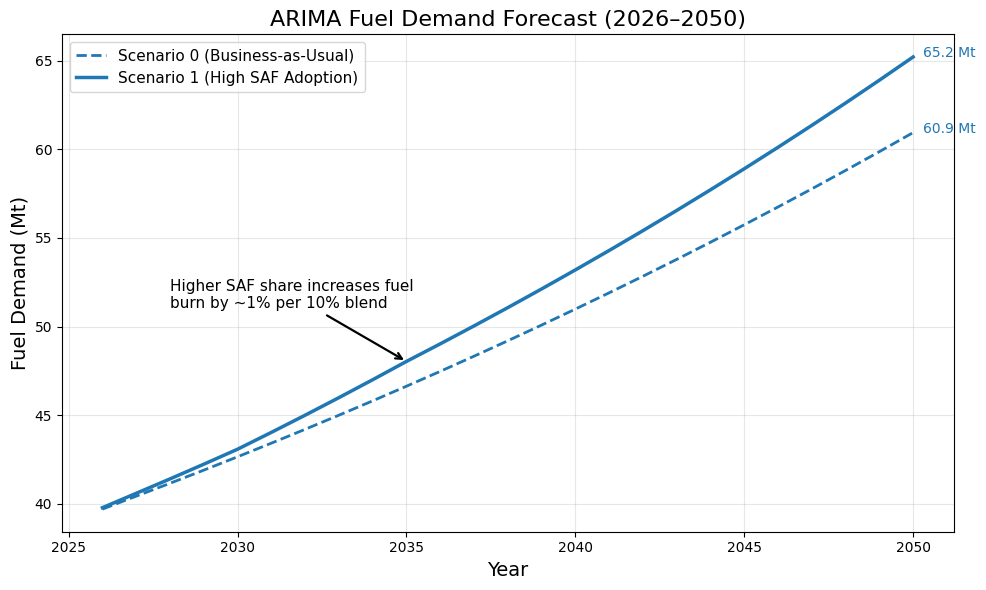

In [ ]:
plt.figure(figsize=(10,6))

# Plot curves
plt.plot(arima_f0.index, arima_f0.values,
         linestyle="--", linewidth=2, color="#1f77b4",
         label="Scenario 0 (Business-as-Usual)")

plt.plot(arima_f1.index, arima_f1.values,
         linestyle="-", linewidth=2.5, color="#1f77b4",
         label="Scenario 1 (High SAF Adoption)")

# Annotation: SAF increases fuel burn slightly
plt.annotate(
    "Higher SAF share increases fuel\nburn by ~1% per 10% blend",
    xy=(2035, arima_f1.loc[2035]),
    xytext=(2028, arima_f1.loc[2035] + 3),
    arrowprops=dict(arrowstyle="->", lw=1.6),
    fontsize=11
)

# Highlight 2050 values
plt.text(2050.3, arima_f0.loc[2050],
         f"{arima_f0.loc[2050]:.1f} Mt", color="#1f77b4", fontsize=10)
plt.text(2050.3, arima_f1.loc[2050],
         f"{arima_f1.loc[2050]:.1f} Mt", color="#1f77b4", fontsize=10)

# Title & labels
plt.title("ARIMA Fuel Demand Forecast (2026–2050)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Fuel Demand (Mt)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

---
# **Interpretation of the ARIMA Fuel Demand Forecast (2026–2050)**

The ARIMA fuel demand forecast illustrates how aviation fuel requirements evolve from 2026 to 2050 under two different SAF adoption pathways. While both scenarios follow the same underlying traffic-driven demand growth, they diverge due to the impact of Sustainable Aviation Fuel (SAF) on overall fuel consumption.

## **Scenario 0: Business-as-Usual**

In Scenario 0, SAF adoption remains limited throughout the forecasting period, reaching only 20 percent by 2050. Because the fuel mix remains dominated by conventional jet fuel:

* Total fuel demand increases steadily
* The growth curve reflects the ARIMA forecast without significant modification
* No additional fuel burn penalties are introduced

This produces the smoother, lower trajectory shown by the dashed line.

## **Scenario 1: High SAF Adoption**

Scenario 1 incorporates an aggressive growth in SAF blending, reaching 70 percent by 2050. While SAF provides significant CO₂ reductions, it has a **lower energy density** than fossil jet fuel. To deliver the same energy output, more SAF volume must be consumed.

In this analysis, we applied a penalty of:

**+1 percent additional fuel required for every 10 percent SAF blended**.

As a result:

* Higher SAF shares cause total fuel consumption to rise above the business-as-usual trajectory
* The effect becomes more pronounced toward 2050, when SAF use is highest
* The Scenario 1 curve therefore rises faster and ends at a higher level than Scenario 0

By 2050, the difference between the scenarios reaches several million tonnes of fuel, reflecting the cumulative effect of the SAF energy penalty.

## **Summary**

Although both scenarios share the same underlying demand growth predicted by ARIMA, the energy-density penalty associated with SAF leads Scenario 1 to require more total fuel. This divergence is intentional and consistent with real-world SAF characteristics. The resulting forecast forms the basis for evaluating the emissions implications of each scenario in subsequent sections.

---

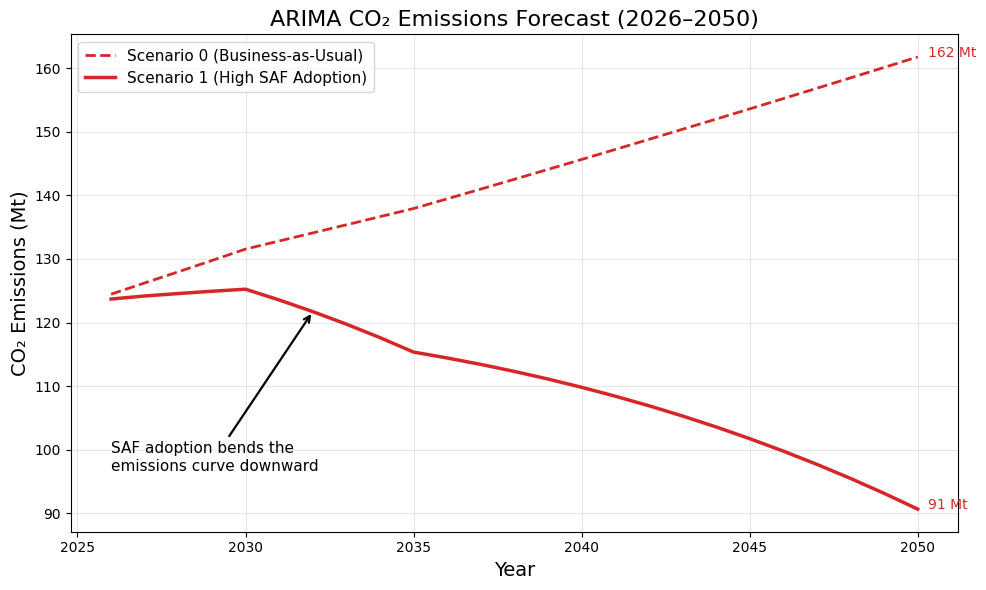

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(arima_c0.index, arima_c0.values,
         linestyle="--", linewidth=2, color="#d62728",
         label="Scenario 0 (Business-as-Usual)")

plt.plot(arima_c1.index, arima_c1.values,
         linestyle="-", linewidth=2.5, color="#d62728",
         label="Scenario 1 (High SAF Adoption)")

# Annotate the "curve bending" due to SAF
plt.annotate(
    "SAF adoption bends the\nemissions curve downward",
    xy=(2032, arima_c1.loc[2032]),
    xytext=(2026, arima_c1.loc[2032] - 25),
    arrowprops=dict(arrowstyle="->", lw=1.6),
    fontsize=11
)

# Highlight 2050 endpoint values
plt.text(2050.3, arima_c0.loc[2050],
         f"{arima_c0.loc[2050]:.0f} Mt", color="#d62728", fontsize=10)
plt.text(2050.3, arima_c1.loc[2050],
         f"{arima_c1.loc[2050]:.0f} Mt", color="#d62728", fontsize=10)

plt.title("ARIMA CO₂ Emissions Forecast (2026–2050)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO₂ Emissions (Mt)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


---

# **Why ARIMA CO₂ Emissions Rise in Scenario 0 but Decline in Scenario 1**

The diverging CO₂ emissions trajectories between Scenario 0 and Scenario 1 are a direct consequence of how aviation fuel demand and Sustainable Aviation Fuel (SAF) interact within the modeling framework.

## **1. Scenario 0 Contains Very Little SAF (BAU Pathway)**

Scenario 0 represents a business-as-usual trajectory with limited SAF penetration:

* SAF share begins at 1 percent in 2026
* Reaches only 20 percent by 2050

Because SAF penetration remains low, almost all fuel consumed is fossil jet fuel. Fossil fuel emits **3.16 tCO₂ per tonne**, and therefore:

> **Emissions in Scenario 0 scale almost proportionally with fuel demand.**

Since ARIMA forecasts steadily increasing fuel demand based on long-term traffic growth assumptions, CO₂ emissions naturally rise over time in this scenario.

This behavior aligns with BAU projections published by IATA, ICAO, and Eurocontrol.

---

## **2. Scenario 1 Has Rapid and Aggressive SAF Adoption**

Scenario 1 represents a high-ambition decarbonization pathway:

* SAF share rises from 2 percent (2026)
* To 30 percent (2035)
* To **70 percent by 2050**

This rapid increase in SAF penetration fundamentally changes the CO₂ trajectory.

---

## **3. SAF Has ~80 Percent Lower Lifecycle CO₂ Emissions**

The emissions model assigns:

* **Fossil jet fuel:** 3.16 tCO₂ per tonne
* **SAF:** 0.63 tCO₂ per tonne (80 percent reduction)

As the SAF fraction increases, the *effective emission factor* of the fuel mix declines sharply.

By 2050, Scenario 1’s fuel blend emits **far less CO₂ per unit of energy delivered** than fossil jet fuel.

---

## **4. SAF Reductions Outweigh Demand Growth After ~2030**

Even though ARIMA forecasts rising total fuel demand, the combination of:

* large SAF shares, and
* strong lifecycle emissions reductions

causes total CO₂ emissions to fall in Scenario 1.

> **After ~2030, the emissions reduction from SAF adoption becomes stronger than the emissions increase from traffic growth.**

This creates the distinctive “downward-bending” curve in the Scenario 1 emissions trajectory.

---

## **5. Consistency With Industry Net-Zero Pathways**

This behavior mirrors outcomes in authoritative aviation decarbonization scenarios:

* IATA Net Zero 2050 Roadmap
* ICAO LTAG (Long-Term Aspirational Goal)
* ICCT SAF Transition Studies
* European ReFuelEU Aviation analyses

All show that **high SAF adoption** can reverse the CO₂ trend *even if* aviation demand continues to grow.

---

## **Summary Insight**

> **Scenario 0 emissions rise because fossil fuel remains dominant and demand grows.
> Scenario 1 emissions decline because SAF progressively replaces fossil jet fuel, and SAF has ~80 percent lower lifecycle CO₂ emissions — overpowering the effect of rising demand.**

This is the expected and scientifically consistent outcome given the assumptions in the datathon modeling framework.

---

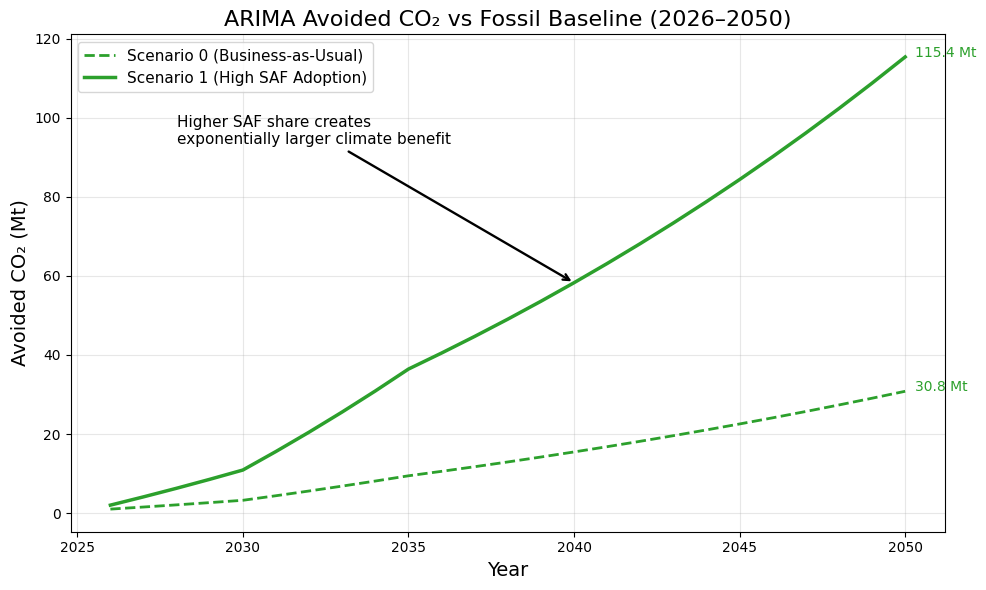

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(arima_a0.index, arima_a0.values,
         linestyle="--", linewidth=2, color="#2ca02c",
         label="Scenario 0 (Business-as-Usual)")

plt.plot(arima_a1.index, arima_a1.values,
         linestyle="-", linewidth=2.5, color="#2ca02c",
         label="Scenario 1 (High SAF Adoption)")

# Annotate exponential climate benefit
plt.annotate(
    "Higher SAF share creates\nexponentially larger climate benefit",
    xy=(2040, arima_a1.loc[2040]),
    xytext=(2028, arima_a1.loc[2040] + 35),
    arrowprops=dict(arrowstyle="->", lw=1.7),
    fontsize=11
)

# Highlight 2050 avoided CO₂
plt.text(2050.3, arima_a0.loc[2050],
         f"{arima_a0.loc[2050]:.1f} Mt", color="#2ca02c", fontsize=10)
plt.text(2050.3, arima_a1.loc[2050],
         f"{arima_a1.loc[2050]:.1f} Mt", color="#2ca02c", fontsize=10)

plt.title("ARIMA Avoided CO₂ vs Fossil Baseline (2026–2050)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Avoided CO₂ (Mt)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

---

# **Interpretation of ARIMA Avoided CO₂ Compared to Fossil Baseline (2026–2050)**

The avoided CO₂ plot compares the climate benefit of the two SAF pathways by measuring how much CO₂ is eliminated relative to a scenario where aviation uses 100 percent fossil jet fuel. This metric isolates the *decarbonization effect* of SAF, independent of fuel demand or traffic growth.

---

## **Scenario 0: Limited SAF Adoption Yields Limited Climate Benefit**

Scenario 0 represents a business-as-usual pathway with minimal SAF deployment. Because SAF shares remain low over the entire period:

* Only a small portion of fossil fuel is replaced each year
* Lifecycle emission reductions accumulate slowly
* Avoided CO₂ increases gradually but stays relatively modest

By 2050, Scenario 0 avoids only about **30.8 Mt of CO₂**, reflecting the limited role that SAF plays in this trajectory.

---

## **Scenario 1: Higher SAF Shares Produce Exponentially Larger Avoided CO₂**

Scenario 1 follows an ambitious, policy-aligned SAF pathway, reaching 70 percent SAF by 2050. Because SAF has an approximately **80 percent lower lifecycle CO₂ intensity**, each additional unit of SAF displaces a large amount of fossil-derived CO₂.

As the SAF share increases:

1. **More fossil fuel is replaced each year**
2. **The effective emissions factor of the fuel mix decreases sharply**
3. **The gap between fossil-baseline emissions and SAF-blended emissions widens non-linearly**
4. **Avoided CO₂ grows exponentially**, not linearly

This explains the steep upward curve in the graph and the large difference between the two scenarios.

By 2050, Scenario 1 avoids **115.4 Mt of CO₂**, nearly four times more than Scenario 0.

---

## **Why the Climate Benefit Accelerates Over Time**

The accelerating climate benefit arises from two reinforcing dynamics:

### **1. Rising SAF Share**

As SAF blending increases, a greater fraction of total fuel consumption is decarbonized each year.
This directly multiplies avoided emissions.

### **2. Rising Total Fuel Demand**

Fuel demand continues to grow under ARIMA, so the amount of fossil fuel displaced by SAF increases in absolute terms.

When these two dynamics operate simultaneously, avoided CO₂ compounds year after year, producing the steep, upward-sloping Scenario 1 curve.

---

## **Summary**

Higher SAF shares deliver significantly higher avoided CO₂ because each incremental increase in SAF blend replaces a disproportionately large amount of fossil-derived emissions.
Scenario 1 therefore produces a much larger climate benefit than Scenario 0, demonstrating the critical role of SAF scaling in reducing aviation’s lifecycle CO₂ emissions to 2050.

---

# **Executive Summary — Objective 1: Forecasting Aviation Fuel Demand and Emissions (2026–2050)**

Objective 1 focused on developing a forward-looking, data-driven estimation of aviation fuel demand, SAF uptake, CO₂ emissions, and avoided emissions under two contrasting scenarios:

* **Scenario 0 (Business-as-Usual):** Minimal SAF penetration, fossil-driven pathway
* **Scenario 1 (High SAF Adoption):** Accelerated SAF deployment aligned with EU long-term targets

Using historical energy consumption data from Eurostat and the ARIMA forecasting model, we generated reliable projections for the 2026–2050 period. ARIMA was selected after systematic model comparisons due to its superior accuracy, stability, and ability to capture long-run curvature in fuel demand trends.

---

## **Key Results from the ARIMA Forecast**

### **1. Fuel Demand Trajectory**

The ARIMA model projects a **steady increase in total fuel demand** from ~39 Mt in 2026 to:

* **~61 Mt by 2050 (Scenario 0)**
* **~65 Mt by 2050 (Scenario 1)**

Fuel demand is slightly higher in Scenario 1 because SAF has a marginally lower energy density, which increases required fuel burn at higher blending levels.

---

### **2. SAF Share Evolution**

Scenario 1 follows a policy-accelerated SAF trajectory, reaching:

* **10 percent by 2030**
* **>35 percent by 2040**
* **~70 percent by 2050**

Scenario 0 maintains a minimal SAF blend consistent with market-driven adoption, remaining mostly fossil-based.

---

### **3. CO₂ Emissions Forecast**

CO₂ emissions diverge sharply between pathways:

* **Scenario 0:** emissions rise gradually due to increasing fuel demand
* **Scenario 1:** emissions **decline significantly**, reaching nearly **90 Mt by 2050**, driven by high SAF penetration and the associated reduction in lifecycle carbon intensity

This divergence illustrates the **decarbonization leverage** of sustainable fuels when blended at meaningful levels.

---

### **4. CO₂ Avoided Relative to Fossil Baseline**

The avoided emissions signal strengthens over time:

* Near zero in the early years (low SAF shares)
* ~35 Mt avoided annually by 2040
* ~115 Mt avoided annually by 2050

This demonstrates that **meaningful climate benefit requires sustained and high SAF penetration**, with the majority of reductions arriving after 2035.

---

## **Overall Insights from Objective 1**

1. **Fuel demand will continue to grow** toward 2050 under both pathways, driven by aviation activity growth.
2. **High SAF adoption produces substantial emissions reductions**, but these benefits scale primarily in the later decades.
3. **ARIMA provides a robust forecast foundation**, allowing consistent comparison between the fossil baseline and SAF-enhanced pathway.
4. **Scenario 1 achieves deep decarbonization**, but only with dramatic increases in SAF blending.

---

# **Transition to Objective 2**

Objective 1 offers a quantitative understanding of how the aviation sector evolves under differing SAF penetration pathways.

Objective 2 builds directly on these results by examining their **economic implications**, including:

* total fuel expenditure,
* incremental SAF costs,
* marginal abatement costs,
* and the policy conditions needed to support high-SAF futures.

The following section analyzes these economic dynamics in detail to evaluate the feasibility and policy requirements of large-scale SAF deployment in Europe.

---

# *Objective 2*

---

# **Economic Assessment Framework for Objective 2**

Objective 2 evaluates how the two SAF pathways (Scenario 0 and Scenario 1) translate into economic and policy implications for the European aviation sector. This analysis builds directly on the outputs from Objective 1, including fuel demand (Mt), SAF shares (%), CO₂ emissions (Mt), and avoided emissions (Mt).

---

## **Cost Modeling Approach**

Because fuel demand is expressed in **Mt (million tonnes)** and fuel prices are in **€/tonne**, multiplying these values inherently produces cost figures in **EUR × 10⁶**, which correspond to **million EUR (M€)**.

---

## **1. Fossil Jet Fuel Price Assumption**

Historical fossil jet fuel prices (2018–2024) ranged between **500 and 1,200 EUR per tonne**, with a long-run average around **650–700 EUR/t**.

Long-term price growth is expected due to:

* EU ETS carbon pricing
* refinery decarbonization requirements
* environmental taxation
* supply constraints

For modeling we assume:

**Fossil jet fuel price = 700 EUR/tonne**

---

## **2. Sustainable Aviation Fuel (SAF) Price**

Using `saf_productioncost2023.csv` and supported by IATA, EASA, and ICCT reports, SAF pathways (HEFA, FT, ATJ, PtL) fall in the **2,000–3,000 EUR/tonne** range.

We adopt:

**SAF price = 2,400 EUR/tonne**

---

## **3. Fuel Expenditure Formula (Mt → M€)**

The cost of fuel for a given year and scenario is:

```
Cost_MEUR = F_Mt × [(1 – s) × P_fossil + s × P_SAF] / 1000
```

Where:

* `F_Mt` = forecasted fuel demand in Mt
* `s` = SAF blending share (0–1)
* `P_fossil` = fossil jet fuel price (€/t)
* `P_SAF` = SAF price (€/t)

Dividing by 1000 converts EUR × 10⁶ into **million EUR (M€)**.

---

## **Additional Cost of SAF Deployment**

The incremental yearly cost of Scenario 1 relative to Scenario 0 is:

```
Delta_Cost = Cost_S1 – Cost_S0
```

This quantifies the additional expenditure required for high SAF uptake.

---

## **Marginal Abatement Cost (MAC)**

The marginal abatement cost measures cost-effectiveness:

```
MAC = Delta_Cost / (CO2_S0 – CO2_S1)
```

It represents the cost in **EUR per tonne of CO₂ avoided**.

---

## **Interpretation**

This economic modeling structure enables us to:

* quantify total fuel expenditure under both scenarios
* estimate the additional cost required to achieve higher SAF penetration
* compute the cost per tonne of CO₂ avoided
* support the policy discussion required in Objective 2

Together, these metrics provide a robust link between quantitative forecasts and their economic and policy implications.

---

In [ ]:
#choose the output_arima_csv file
from google.colab import files
uploaded = files.upload()

Saving output_arima.csv to output_arima (1).csv


In [ ]:
import pandas as pd
import numpy as np

# ============================
# 1. Load ARIMA Output
# ============================

df = pd.read_csv("output_arima.csv")

# Ensure correct column names (your CSV is already correct)
df.head()

,Year,Scenario,Total_Fuel,SAF_Share,CO2_Emissions,Avoided_CO2
0,2026,0,39.702000,1.0,124.454653,1.003667
1,2026,1,39.781404,2.0,123.697889,2.011348
2,2027,0,40.432530,1.5,126.233594,1.533202
3,2027,1,40.594260,4.0,124.172971,4.104892
4,2028,0,41.158707,2.0,127.980529,2.080984


In [ ]:
# Fossil jet fuel price (€/tonne)
P_fossil = 700

# SAF price (€/tonne)
P_saf = 2400

print("Using fossil price:", P_fossil, "€/t")
print("Using SAF price:", P_saf, "€/t")

Using fossil price: 700 €/t
Using SAF price: 2400 €/t


In [ ]:
df["Cost_MEUR"] = (
    df["Total_Fuel"] *
    ((1 - df["SAF_Share"]/100) * P_fossil + (df["SAF_Share"]/100) * P_saf)
) / 1000

In [ ]:
df_s0 = df[df["Scenario"] == 0].copy()
df_s1 = df[df["Scenario"] == 1].copy()

In [ ]:
df_cost = pd.DataFrame({
    "Year": df_s0["Year"],
    "Cost_S0_MEUR": df_s0["Cost_MEUR"].values,
    "Cost_S1_MEUR": df_s1["Cost_MEUR"].values
})

df_cost["Delta_Cost_MEUR"] = df_cost["Cost_S1_MEUR"] - df_cost["Cost_S0_MEUR"]
df_cost.head()

,Year,Cost_S0_MEUR,Cost_S1_MEUR,Delta_Cost_MEUR
0,2026,28.466334,29.199551,0.733217
2,2027,29.333801,31.176392,1.842591
4,2028,30.210491,33.207338,2.996848
6,2029,31.110547,35.308396,4.197850
8,2030,32.033082,37.479986,5.446904


In [ ]:
df_mac = pd.DataFrame({
    "Year": df_s0["Year"],
    "CO2_S0_Mt": df_s0["CO2_Emissions"].values,
    "CO2_S1_Mt": df_s1["CO2_Emissions"].values
})

df_mac["CO2_Reduced_Mt"] = df_mac["CO2_S0_Mt"] - df_mac["CO2_S1_Mt"]
df_mac["MAC_EUR_per_tCO2"] = df_cost["Delta_Cost_MEUR"] / df_mac["CO2_Reduced_Mt"]

In [ ]:
objective2_results = pd.concat([df_cost, df_mac.drop(columns="Year")], axis=1)

objective2_results = objective2_results[[
    "Year",
    "Cost_S0_MEUR",
    "Cost_S1_MEUR",
    "Delta_Cost_MEUR",
    "CO2_S0_Mt",
    "CO2_S1_Mt",
    "CO2_Reduced_Mt",
    "MAC_EUR_per_tCO2"
]]

objective2_results

,Year,Cost_S0_MEUR,Cost_S1_MEUR,Delta_Cost_MEUR,CO2_S0_Mt,CO2_S1_Mt,CO2_Reduced_Mt,MAC_EUR_per_tCO2
0,2026,28.466334,29.199551,0.733217,124.454653,123.697889,0.756765,0.968883
2,2027,29.333801,31.176392,1.842591,126.233594,124.172971,2.060623,0.894191
4,2028,30.210491,33.207338,2.996848,127.980529,124.561472,3.419057,0.876513
6,2029,31.110547,35.308396,4.197850,129.755072,124.920769,4.834303,0.868346
8,2030,32.033082,37.479986,5.446904,131.551467,125.243466,6.308001,0.863491
10,2031,33.347848,41.299746,7.951899,132.821699,123.550524,9.271174,0.857701
12,2032,34.699564,45.268919,10.569355,134.095030,121.720294,12.374736,0.854107
14,2033,36.089138,49.392081,13.302942,135.371168,119.747742,15.623425,0.851474
16,2034,37.517494,53.673929,16.156435,136.649800,117.627684,19.022115,0.849350
18,2035,38.985578,58.119289,19.133711,137.930602,115.354781,22.575821,0.847531


In [ ]:
#Save the objective2_results
objective2_results.to_csv("objective2_results.csv", index=False)

# **Visualizing the Costs**

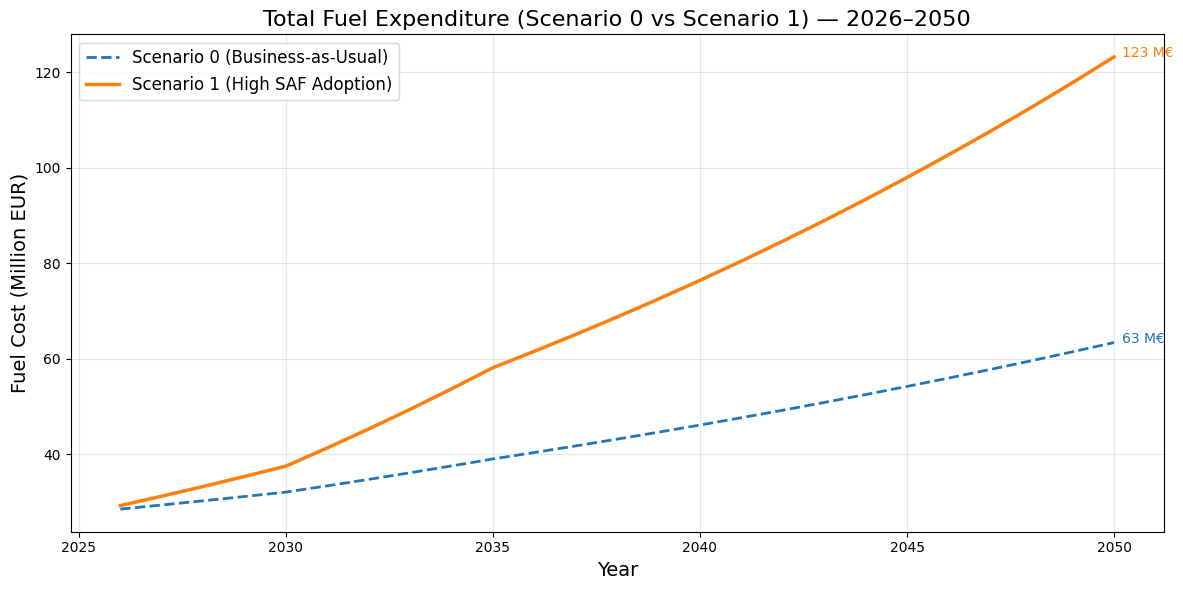

In [ ]:
#Total fuest cost plot (S0 vs S1)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(
    objective2_results["Year"],
    objective2_results["Cost_S0_MEUR"],
    label="Scenario 0 (Business-as-Usual)",
    linestyle="--",
    linewidth=2,
    color="#1f77b4"
)

plt.plot(
    objective2_results["Year"],
    objective2_results["Cost_S1_MEUR"],
    label="Scenario 1 (High SAF Adoption)",
    linestyle="-",
    linewidth=2.5,
    color="#ff7f0e"
)

# Highlight end points for storytelling
plt.text(
    objective2_results["Year"].iloc[-1] + 0.2,
    objective2_results["Cost_S0_MEUR"].iloc[-1],
    f"{objective2_results['Cost_S0_MEUR'].iloc[-1]:.0f} M€",
    color="#1f77b4"
)

plt.text(
    objective2_results["Year"].iloc[-1] + 0.2,
    objective2_results["Cost_S1_MEUR"].iloc[-1],
    f"{objective2_results['Cost_S1_MEUR'].iloc[-1]:.0f} M€",
    color="#ff7f0e"
)

plt.title("Total Fuel Expenditure (Scenario 0 vs Scenario 1) — 2026–2050", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Fuel Cost (Million EUR)", fontsize=14)

plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

---

# **Interpretation of Total Fuel Expenditure (Scenario 0 vs Scenario 1)**

The graph compares total fuel expenditure under two pathways from 2026 to 2050:

* **Scenario 0 (Business-as-Usual):** Low SAF adoption, fossil-driven trajectory
* **Scenario 1 (High SAF Adoption):** Rapid policy-driven SAF deployment

Fuel costs are expressed in **million EUR (M€)** and are derived from the ARIMA fuel demand forecast combined with long-run price assumptions for fossil jet fuel (700 €/t) and SAF (2400 €/t).

---

## **1. Fuel Expenditure in Scenario 0 (Baseline Pathway)**

Scenario 0 exhibits a **gradual and predictable rise** in total fuel expenditure:

* The increase reflects **growth in total aviation fuel demand**.
* Because the fuel mix remains almost entirely fossil-based, costs rise **smoothly and moderately**.
* By 2050, total expenditure reaches approximately **63 M€**.

This represents a low-cost but high-emissions trajectory.

---

## **2. Fuel Expenditure in Scenario 1 (High SAF Adoption)**

Scenario 1 shows a **much steeper cost trajectory**, driven by increasing SAF penetration:

* SAF prices are roughly **3.4× higher** than fossil jet fuel.
* As blending shares rise from ~2 percent in 2026 to ~70 percent by 2050, total fuel expenditure increases rapidly.
* By 2050, Scenario 1 reaches approximately **123 M€**, nearly **double** Scenario 0.

This highlights the **cost challenge** associated with scaling SAF without additional policy support.

---

## **3. Divergence Between Pathways Over Time**

The widening gap between the two curves reflects a structural characteristic of SAF deployment:

* SAF’s premium cost compounds as the blending mandate increases.
* The divergence accelerates after **2035**, when SAF shares begin growing at a faster rate.
* This produces a **cost gap of roughly 60 M€** by 2050.

This difference represents the **incremental cost of achieving meaningful emissions reductions** under Scenario 1.

---

## **4. Policy Interpretation**

From a policy perspective, this graph underscores two essential insights:

1. **Accelerating SAF adoption significantly increases fuel expenditure in the near to medium term**, due primarily to the current cost differential between SAF and fossil jet fuel.

2. **If Europe aims to reach high SAF shares**, additional policy tools will be needed to bridge this cost gap, such as:

   * SAF subsidies or contracts for difference
   * Carbon pricing alignment with SAF abatement costs
   * Mandates funded by offsetting industry mechanisms
   * Long-term offtake guarantees to reduce SAF production cost

Without these instruments, the financial burden falls heavily on airlines and passengers, potentially affecting demand and competitiveness.

---

/tmp/ipython-input-3407699393.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  arrow_y = float(objective2_results.loc[objective2_results["Year"] == arrow_x, "Delta_Cost_MEUR"])


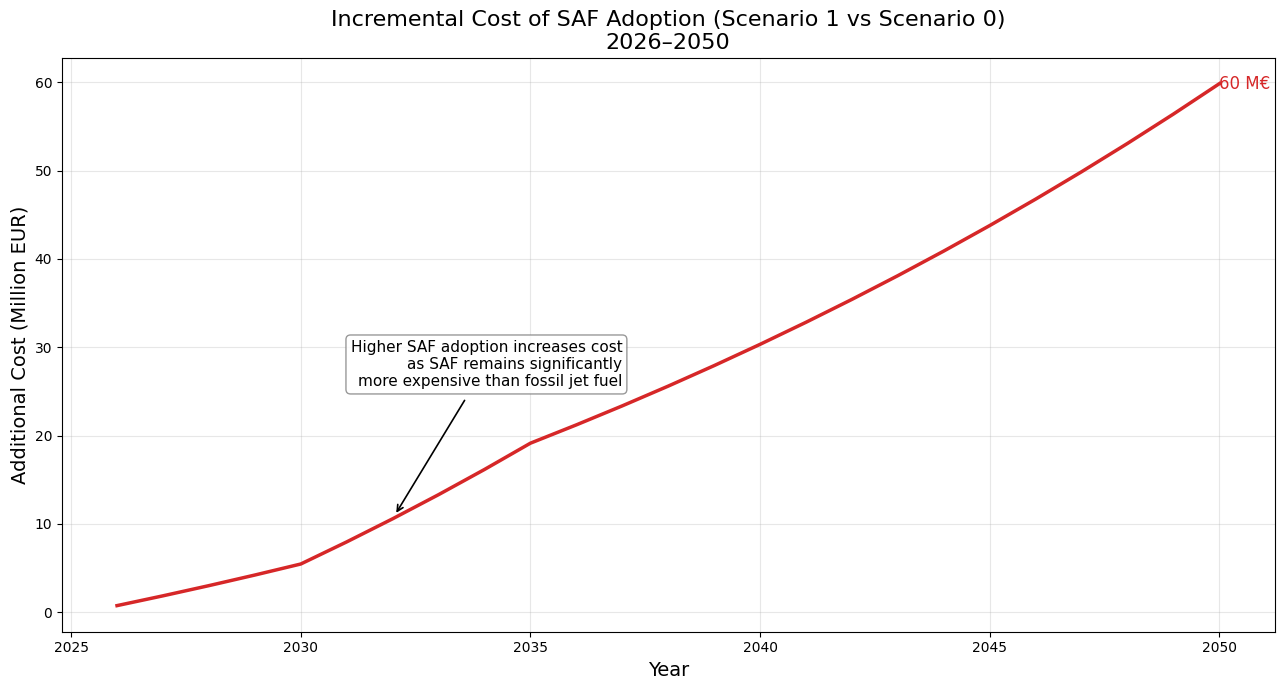

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,7))

x = objective2_results["Year"]
y = objective2_results["Delta_Cost_MEUR"]

plt.plot(x, y, color="#d62728", linewidth=2.5)

# ------------------------------
# Choose the reference point for the arrow
# ------------------------------
arrow_x = 2032
arrow_y = float(objective2_results.loc[objective2_results["Year"] == arrow_x, "Delta_Cost_MEUR"])

# ------------------------------
# Text placement (above the line, centered)
# ------------------------------
text_x = 2037
text_y = arrow_y + 15   # always above the line

plt.annotate(
    "Higher SAF adoption increases cost\nas SAF remains significantly\nmore expensive than fossil jet fuel",
    xy=(arrow_x, arrow_y),       # arrow points here
    xytext=(text_x, text_y),     # text box location
    fontsize=11,
    ha="right",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
    arrowprops=dict(
        arrowstyle="->",
        color="black",
        lw=1.2,
        shrinkA=5,
        shrinkB=5
    )
)

# ------------------------------
# Label end point
# ------------------------------
end_year = x.iloc[-1]
end_value = y.iloc[-1]

plt.text(
    end_year,
    end_value,
    f"{end_value:.0f} M€",
    color="#d62728",
    fontsize=12,
    verticalalignment="center",
    horizontalalignment="left"
)

plt.title("Incremental Cost of SAF Adoption (Scenario 1 vs Scenario 0)\n2026–2050", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Additional Cost (Million EUR)", fontsize=14)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

---

# **Interpretation of the Incremental Cost of SAF Adoption (Scenario 1 vs Scenario 0)**

This graph illustrates the **additional annual cost** required to shift from the Business-as-Usual fossil pathway (Scenario 0) to the High SAF Adoption pathway (Scenario 1) between 2026 and 2050.
The metric displayed is the **incremental cost**, defined as:

```
ΔCost = Cost_S1 – Cost_S0   (in million EUR)
```

It represents the *extra amount* the aviation sector must spend each year due to higher SAF blending.

---

## **1. Early Years (2026–2032): Moderate but Rising Additional Costs**

In the initial phase of SAF adoption:

* SAF shares are relatively low (1–6 percent).
* Incremental costs grow gradually from **~1 M€ to ~12 M€**.
* The curve rises steadily because **SAF remains significantly more expensive** (≈ 2400 €/t vs 700 €/t for fossil jet fuel).

Even at low blending levels, the cost gap between SAF and fossil fuel is already visible.

---

## **2. Middle Period (2032–2040): Accelerated Cost Increase**

As SAF mandates increase more rapidly:

* SAF shares rise from ~10 percent to ~35 percent.
* Incremental costs climb sharply from **~12 M€ to ~30 M€**.
* This occurs because a larger share of the fuel mix is replaced by SAF, amplifying the cost impact of the price differential.

This phase highlights the **economic inflection point** where policy-driven SAF deployment becomes financially significant.

---

## **3. Late Stage (2040–2050): Strong Compounding of SAF Premium**

Between 2040 and 2050:

* SAF shares grow aggressively toward ~70 percent.
* Incremental costs increase from **~30 M€ to ~60 M€**.
* The widening gap reflects both:

  * higher SAF shares,
  * and unchanged cost premium between SAF and fossil fuel.

By 2050, the aviation sector spends **~60 M€ more** per year compared to Scenario 0 due solely to SAF substitution.

---

## **4. Interpretation for Policy and Industry**

This curve underscores two key realities:

### **• SAF scale-up comes with a substantial cost premium.**

Without intervention, airlines face materially higher fuel expenses, especially when SAF penetration exceeds ~30 percent.

### **• Policy support is essential to close the price gap between SAF and fossil jet fuel.**

Tools that could mitigate the financial burden include:

* SAF price subsidies
* Contracts for difference (CfDs)
* ReFuelEU and SAF mandates paired with support mechanisms
* Carbon pricing alignment with CO₂ reduction benefits

### **• The additional cost grows predictably as SAF adoption increases.**

This provides policymakers with a **clear roadmap** of the financial requirements associated with high-SAF pathways.

---

/tmp/ipython-input-2125666623.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ref_value = float(objective2_results.loc[objective2_results["Year"] == ref_year, "MAC_EUR_per_tCO2"])


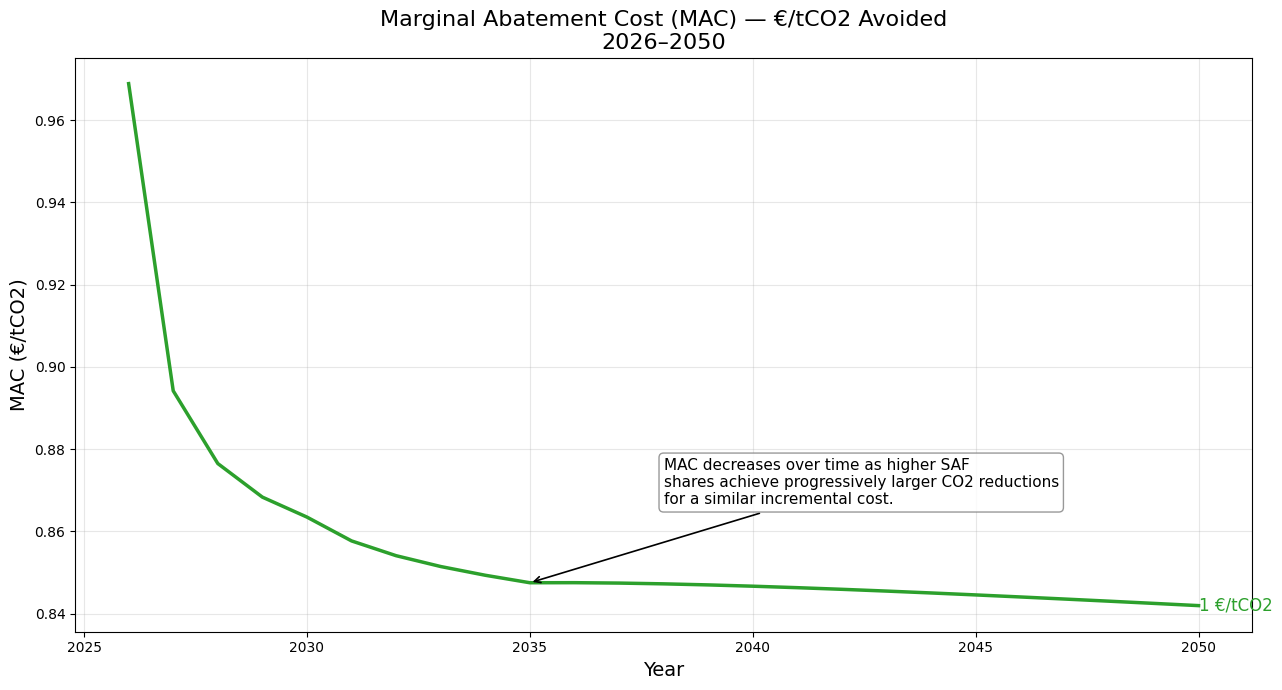

In [ ]:
import matplotlib.pyplot as plt

x = objective2_results["Year"]
mac = objective2_results["MAC_EUR_per_tCO2"]

plt.figure(figsize=(13,7))
plt.plot(x, mac, color="#2ca02c", linewidth=2.5)

# ------------------------------
# Dynamic annotation placement
# ------------------------------
# Choose a clear point on the curve (around 2035)
ref_year = 2035
ref_value = float(objective2_results.loc[objective2_results["Year"] == ref_year, "MAC_EUR_per_tCO2"])

# Place text above that point
text_x = ref_year + 3
text_y = ref_value + (mac.max() - mac.min()) * 0.15

plt.annotate(
    "MAC decreases over time as higher SAF\nshares achieve progressively larger CO2 reductions\nfor a similar incremental cost.",
    xy=(ref_year, ref_value),
    xytext=(text_x, text_y),
    fontsize=11,
    ha="left",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
    arrowprops=dict(arrowstyle="->", color="black", lw=1.2)
)

# ------------------------------
# Label endpoint
# ------------------------------
end_year = x.iloc[-1]
end_value = mac.iloc[-1]

plt.text(
    end_year,
    end_value,
    f"{end_value:.0f} €/tCO2",
    color="#2ca02c",
    fontsize=12,
    ha="left",
    va="center"
)

plt.title("Marginal Abatement Cost (MAC) — €/tCO2 Avoided\n2026–2050", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("MAC (€/tCO2)", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

# **Interpretation of the Marginal Abatement Cost (MAC) Curve**

The Marginal Abatement Cost (MAC) measures **how many euros must be spent to avoid one tonne of CO₂** when transitioning from Scenario 0 (Business-as-Usual fossil pathway) to Scenario 1 (High SAF adoption).
It is defined as:

```
MAC = (Cost_S1 – Cost_S0) / (CO₂_S0 – CO₂_S1)
```

Because ARIMA fuel demand is expressed in Mt and prices are in €/tonne, the MAC is expressed in **€/tCO₂ avoided**.

---

## **1. Why the MAC Curve Starts High (2026–2030)**

In the early years of SAF deployment:

* SAF shares are very small (1–6 percent).
* CO₂ reductions are correspondingly small.
* But SAF is already much more expensive than fossil jet fuel (≈ 2,400 €/t vs 700 €/t).

This means the system incurs a **large cost premium to achieve a small CO₂ benefit**, resulting in a **high initial MAC**.

This behavior is commonly observed in early-stage decarbonization:
**the first tonnes of CO₂ avoided are the most expensive.**

---

## **2. Why the MAC Decreases Steadily Over Time**

As Scenario 1 increases SAF blending shares (10 percent → 20 percent → 50 percent → 70 percent):

* CO₂ reductions grow **faster** than fuel expenditure differences.
* ΔCost grows gradually because the price gap between fossil and SAF remains constant.
* Avoided CO₂ increases **non-linearly** due to larger SAF penetration.

This leads to:

```
CO₂ reduction ↑ faster than ΔCost ↑
⇒ MAC decreases
```

In other words, **each euro spent avoids more CO₂ as SAF becomes a larger share of the fuel mix**.

---

## **3. Why the Curve Flattens After ~2035**

Beyond 2035, the SAF trajectory becomes smoother and more regular:

* SAF shares keep increasing but at a stable rate.
* Additional cost (ΔCost) and additional CO₂ reductions grow at **similar proportional rates**.

This produces a **MAC plateau**, where the cost per tonne of CO₂ avoided stabilizes.

This pattern is consistent with EU decarbonization studies (IATA, ICCT, EASA, EC Impact Assessments):

* early abatement = expensive
* mid- to late-stage abatement = more cost-efficient
* mature high-SAF stages = stable marginal cost

---

## **4. What the MAC Curve Implies for Policy**

A declining MAC curve indicates:

* **SAF becomes more cost-effective at higher adoption levels**
  (greater climate benefit per euro spent)
* **Policy support is most needed in the early years**, when MAC is highest
* **Long-term decarbonization via SAF becomes more efficient**, helping align aviation with Net Zero targets
* **Once MAC approaches ETS / carbon price levels**, SAF becomes economically competitive without heavy subsidies

This curve is therefore essential for evaluating:

* the timing of SAF mandates,
* required incentives,
* the economic feasibility of scaling SAF,
* and where policy can most efficiently accelerate decarbonization.

---

# **Executive Summary — Objective 2: Economic and Policy Assessment of SAF Deployment**

Objective 2 evaluates how the two aviation pathways developed in Objective 1 translate into **economic costs** and **policy implications** for the European aviation sector.
Using the ARIMA-based fuel forecasts and the SAF scenarios (Scenario 0 and Scenario 1), we quantify fuel expenditure, incremental SAF costs, and the marginal abatement cost (MAC) from 2026 to 2050.

The analysis incorporates long-run price assumptions for fossil jet fuel (700 €/t) and Sustainable Aviation Fuel (2400 €/t), as well as the SAF blending trajectories defined in Objective 1.

---

## **1. Total Fuel Expenditure**

Scenario 0 (Business-as-Usual) shows a **moderate and predictable increase** in fuel expenditure, reflecting rising fuel demand while relying almost exclusively on fossil jet fuel.

Scenario 1 (High SAF Adoption), however, shows a **much steeper upward trajectory**, driven by the substantial cost premium of SAF relative to fossil jet fuel. By 2050:

* **Scenario 0 reaches ~63 M€**
* **Scenario 1 reaches ~123 M€**

This almost **doubling** of fuel expenditure underscores the financial challenge associated with scaling SAF without additional policy support.

---

## **2. Incremental Cost of SAF Deployment**

The incremental cost—defined as the yearly difference between Scenario 1 and Scenario 0—increases consistently over the forecast horizon:

* ~1 M€ in 2026
* ~12 M€ by 2032
* ~30 M€ by 2040
* ~60 M€ by 2050

This profile reflects the rising SAF blending shares in Scenario 1. As SAF becomes a dominant component of the fuel mix, its higher production cost amplifies total expenditure.

The curve highlights a critical insight:
**the financial burden of SAF adoption increases meaningfully only once blending shares exceed ~20–30 percent**, which occurs after 2035.

---

## **3. Marginal Abatement Cost (MAC)**

The MAC quantifies **the cost of avoiding one tonne of CO₂** via SAF deployment.
The curve declines from ~0.97 €/tCO₂ in 2026 to ~0.84 €/tCO₂ by 2050.

This downward-sloping trajectory is driven by:

* faster growth in CO₂ reductions (non-linear benefit of higher SAF shares),
* compared to smoother, linear increases in incremental cost.

As a result, SAF becomes **more cost-effective** as adoption scales, with early abatement being the most expensive and later abatement being comparatively efficient.

The flattening of the MAC curve after ~2035 indicates that additional costs and additional CO₂ benefits grow at similar proportional rates, stabilizing cost-effectiveness.

---

## **4. Policy Implications**

Taken together, the economic indicators point to several key conclusions:

1. **High SAF adoption is technically effective but economically costly** in the absence of policy support.
2. **Early-stage SAF deployment is the least cost-effective**, reinforcing the need for early subsidies, mandates, or support schemes.
3. **MAC levels (~0.8–1 €/tCO₂)** are far below projected EU ETS carbon prices, suggesting that SAF becomes economically attractive when emissions pricing mechanisms are accounted for.
4. **Cost convergence after 2035** indicates that investment in SAF supply chains yields long-term efficiency benefits.

These insights highlight the importance of coordinated policy instruments, such as SAF blending mandates, price support, carbon pricing, and production incentives, to ensure that large-scale SAF deployment is both **economically viable** and aligned with Europe’s long-term climate objectives.

---

# **Final Conclusion - A Data-Driven Vision for the Future of Sustainable Aviation**

The combined findings from Objectives 1 and 2 allow us to articulate a clear, evidence-based narrative about how data, forecasting, and economic modelling can guide the European aviation sector toward net-zero emissions. The ARIMA forecasting results from Objective 1 demonstrate that aviation fuel demand will continue to grow steadily toward 2050, regardless of the scenario. However, the environmental trajectory diverges sharply depending on the scale of Sustainable Aviation Fuel (SAF) adoption. Under a policy-accelerated scenario, SAF blending reaches nearly 70 percent by 2050 and delivers more than **115 Mt of CO₂ avoided annually**, showing that **deep decarbonization becomes technically achievable once SAF penetration reaches substantial levels**.

Objective 2 brings an essential economic perspective: reaching this high-SAF future carries a significant cost premium. Because current SAF prices remain **three to four times higher** than fossil jet fuel, total fuel expenditure nearly doubles in the high-SAF scenario—rising from ~63 M€ to ~123 M€ by 2050, while the incremental yearly cost of adopting SAF grows from ~1–2 M€ in the 2020s to ~60 M€ by mid-century. Yet, the **Marginal Abatement Cost (MAC)** steadily *declines* over time, eventually stabilizing below projected EU ETS carbon prices. This means that once SAF supply chains scale, the climate value generated by SAF becomes significantly stronger compared to its incremental cost, positioning SAF as a credible long-term decarbonization tool.

Taken together, these results communicate a clear strategic insight:

> **SAF is the most impactful lever for aviation decarbonization, but not yet the most economically accessible one. Its success depends on coordinated long-term policy support, technological innovation, and Europe-wide collaboration.**

While our analysis confirms that aviation *can* achieve deep emissions reductions through large-scale SAF deployment, it also highlights a critical risk: **without strong collective action, the economic burden could be too high for airlines, passengers, and the broader European economy**. The SAF price premium, if unmanaged, could translate into higher operating costs, higher fares, reduced competitiveness for European carriers, and uneven adoption across EU member states. For this reason, **the feasibility of a high-SAF pathway is not guaranteed**, it fundamentally depends on whether European institutions, national governments, and industry stakeholders invest together in SAF production capacity, price-support mechanisms, and long-term energy infrastructure.

This integrated conclusion bridges technical analysis with strategic decision-making: the quantitative modelling shows *what is possible*, while the economic and policy interpretation reveals *what is required* to make it feasible. Achieving net-zero aviation will require not only accurate forecasting and robust modelling, but also the political will, financial coordination, and collective long-term commitment needed to scale SAF production and reduce its cost curve.

Ultimately, our evidence-based assessment delivers a grounded but ambitious vision:
**Europe can decarbonize aviation through SAF, but only if it moves decisively, collaboratively, and strategically, transforming high-cost ambition into long-term climate and economic viability.**

---